<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/05_embeddings/fastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastText

Carga de los embeddings de fastText en Gensim

In [17]:
from gensim.models.keyedvectors import KeyedVectors

In [18]:
# El listado completo de los vectores disponibles está en https://fasttext.cc/docs/en/crawl-vectors.html
wordvectors_file_vec = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

Vector

In [19]:
wordvectors["persona"]

array([ 0.0122, -0.0413,  0.0267, -0.0098, -0.0243,  0.0137, -0.0116,
       -0.0456, -0.0023, -0.1329, -0.037 , -0.0396, -0.0488, -0.0062,
       -0.0217,  0.0329,  0.0835, -0.0219, -0.0452, -0.0275, -0.0505,
       -0.0274,  0.0726, -0.0407, -0.0115, -0.0477,  0.0022, -0.0453,
       -0.0763, -0.0535, -0.0133, -0.0235, -0.0539,  0.028 , -0.0253,
       -0.005 ,  0.0042,  0.008 , -0.0221,  0.0101, -0.0401, -0.0356,
       -0.0207, -0.0388, -0.0694,  0.0233,  0.    , -0.0296, -0.0017,
        0.0068,  0.0358,  0.0131,  0.0797, -0.0088, -0.0122,  0.0853,
       -0.0062, -0.0232, -0.0384,  0.0089,  0.008 , -0.0127, -0.0494,
       -0.0045, -0.0093, -0.006 , -0.01  ,  0.0182, -0.0105,  0.0079,
       -0.0147,  0.0166, -0.0281, -0.0584, -0.0047,  0.0049,  0.0072,
        0.0254,  0.0292, -0.0092, -0.043 , -0.0036, -0.0267,  0.0178,
       -0.0602,  0.0146,  0.0027, -0.0223,  0.044 , -0.0338, -0.011 ,
        0.0008, -0.0162,  0.002 ,  0.0038,  0.0038,  0.0182,  0.0286,
        0.0493, -0.0

In [20]:
wordvectors["persona"].shape

(300,)

Similitud

In [21]:
wordvectors.similarity('hombre', 'mujer')

0.6847727

In [22]:
wordvectors.similarity('banco', 'justicia')

0.18538794

In [23]:
wordvectors.similar_by_word("gato")

[('perro', 0.8194648623466492),
 ('gatito', 0.8061740398406982),
 ('Gato', 0.7072967886924744),
 ('perrito', 0.6917300820350647),
 ('gatos', 0.6770978569984436),
 ('felino', 0.6705687046051025),
 ('gata', 0.6578809022903442),
 ('cachorro', 0.6557344794273376),
 ('conejo', 0.6412478089332581),
 ('mascota', 0.6264307498931885)]

In [24]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.6996200084686279),
 ('princesa', 0.6584170460700989),
 ('monarca', 0.5745182633399963),
 ('emperatriz', 0.5571600794792175),
 ('Rey', 0.5523390173912048),
 ('reyes', 0.5444135665893555),
 ('hija', 0.5440957546234131),
 ('Reina', 0.5410171747207642),
 ('consorte', 0.5355187654495239),
 ('infanta', 0.5331934094429016)]

Exclusión

In [25]:
lista=('abril', 'mayo', 'septiembre', 'martes', 'julio')
wordvectors.doesnt_match(lista)

'martes'

In [26]:
wordvectors["persona"].shape

(300,)

In [27]:
wordvectors.vectors.shape

(100000, 300)

In [28]:
wordvectors

Vamos a quedarnos solo con 300 palabras para hacer un ejercicio de visualización

In [40]:
vectores=wordvectors.vectors[1000:1300,]

In [39]:
keys=[]
for key in range(1000,1300):
  keys.append(wordvectors.index_to_key[key])

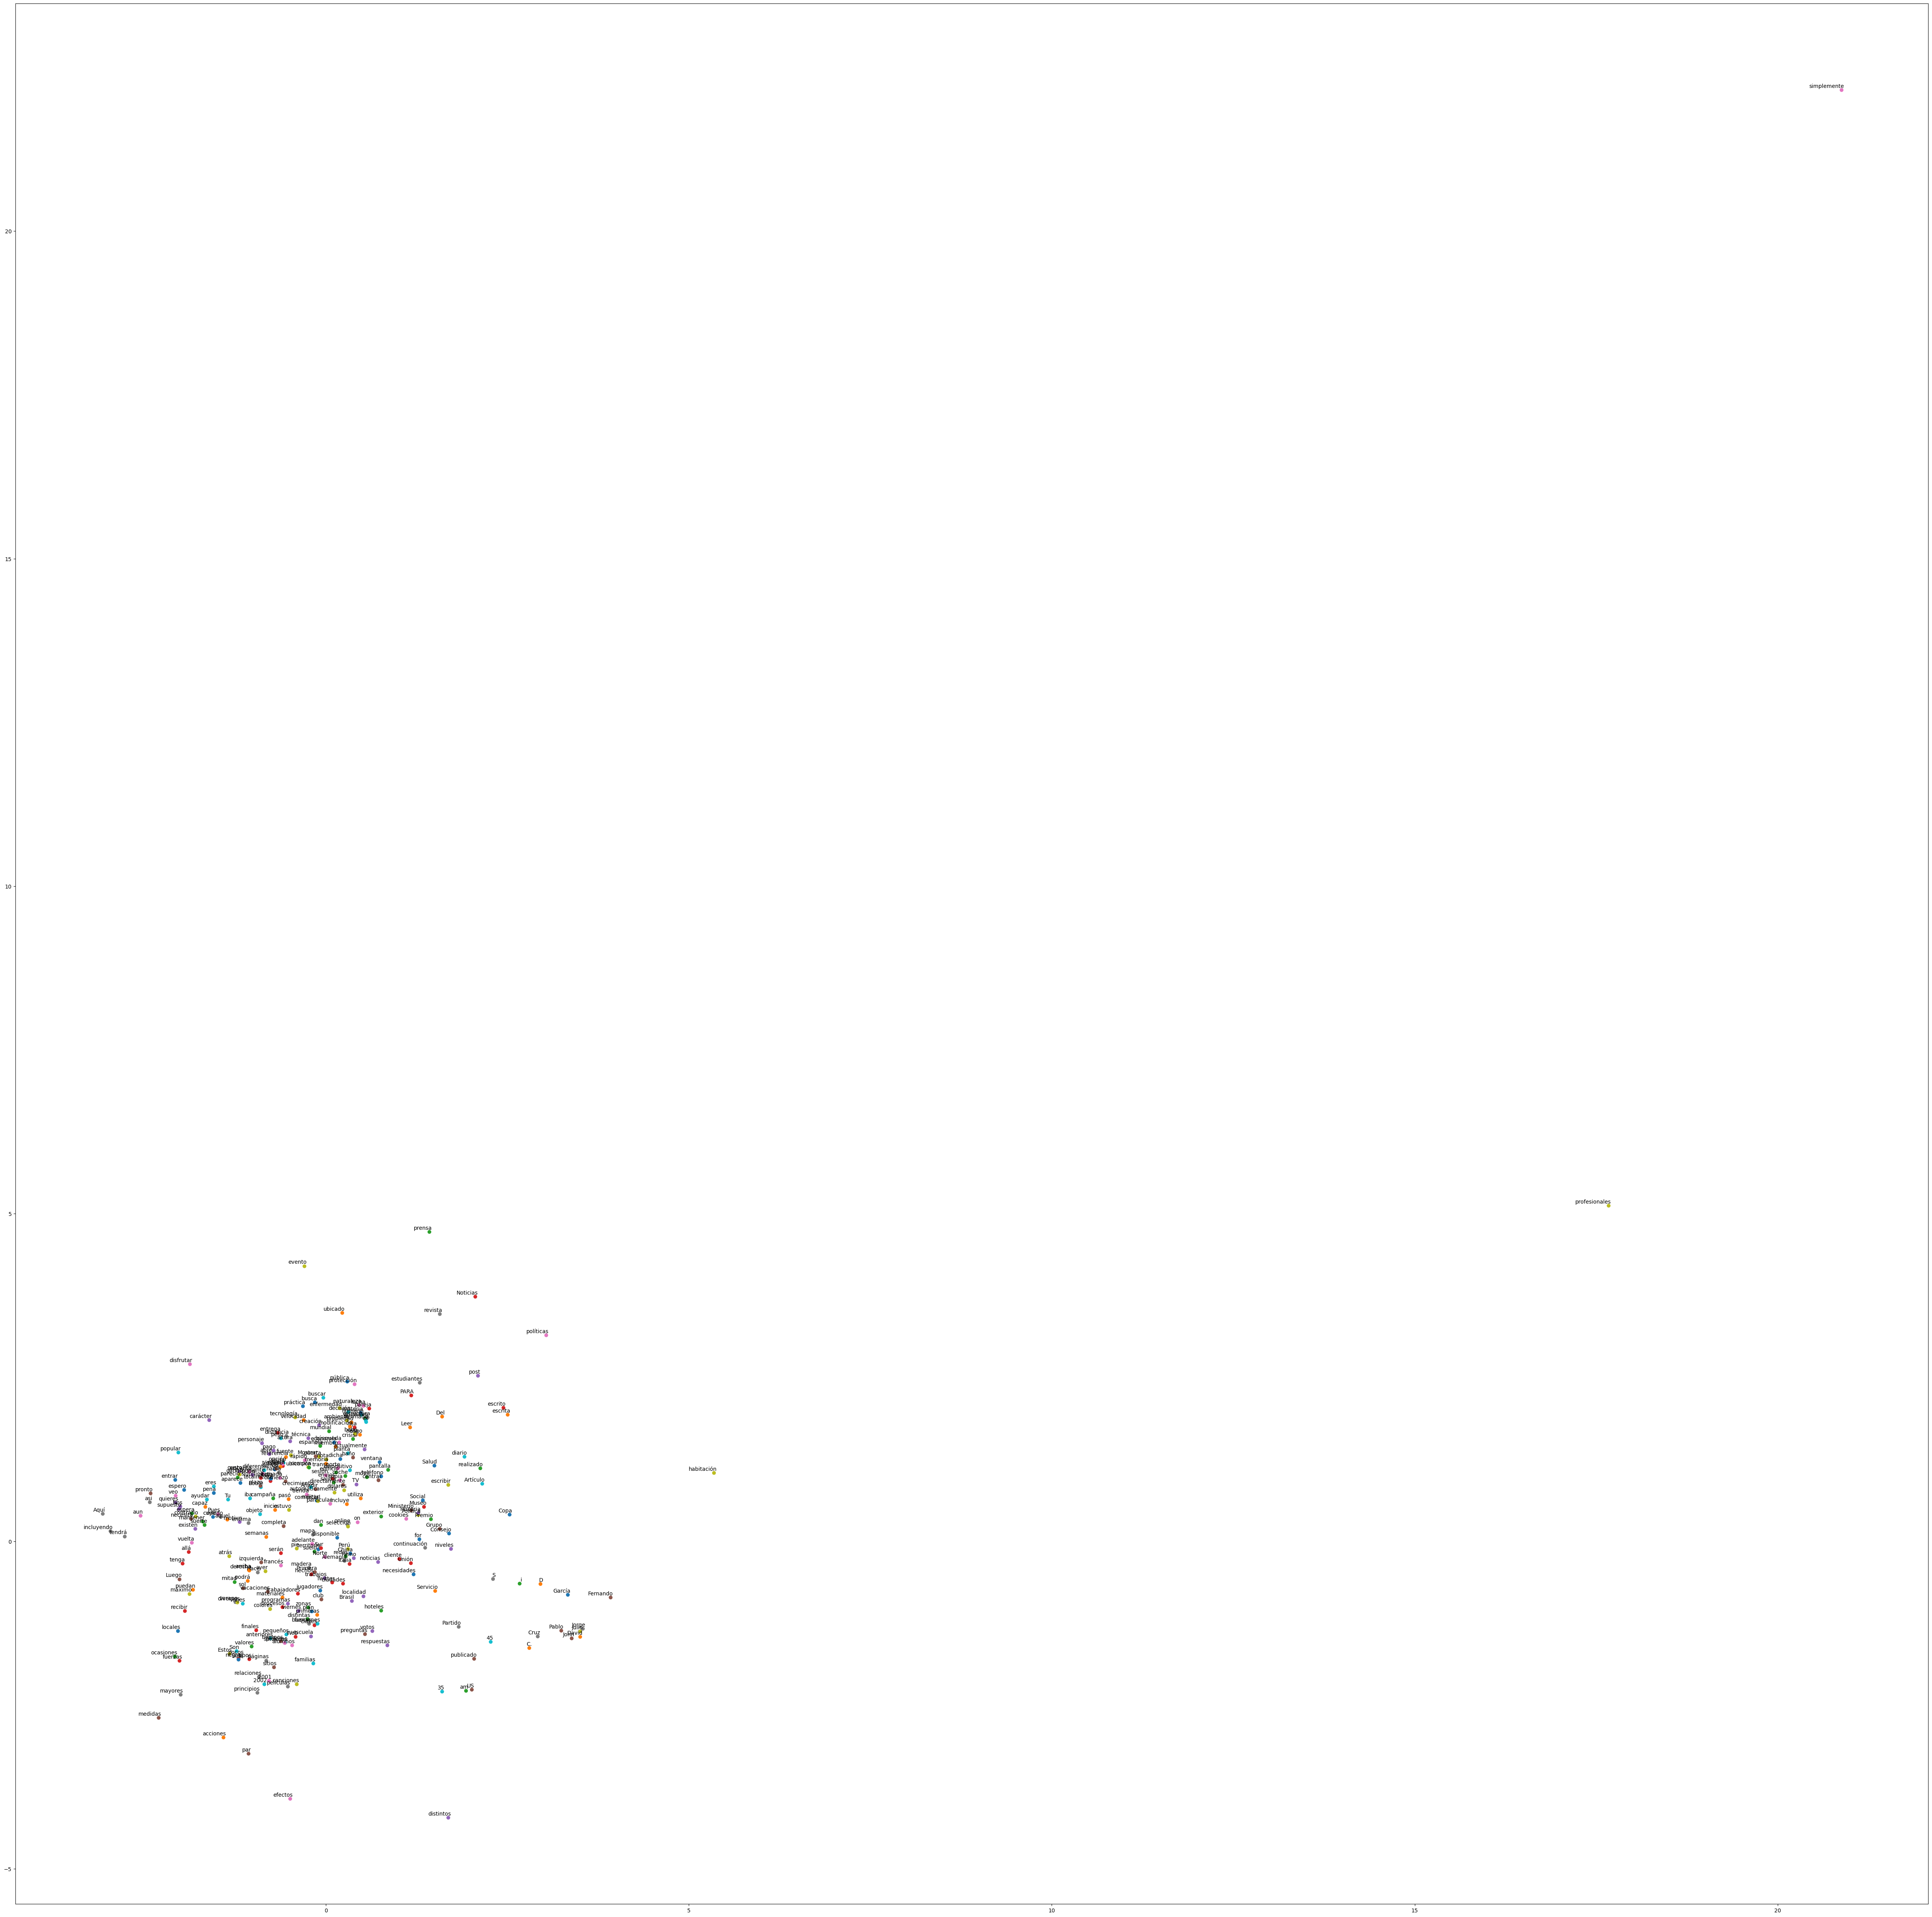

In [41]:
 from sklearn.manifold import TSNE
 import numpy as np
 import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    for word in keys:
        tokens.append(model[word])
        labels.append(word)
    
    tokens=np.array(tokens)
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=250)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(64, 64)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(wordvectors)